In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
text = 'p'

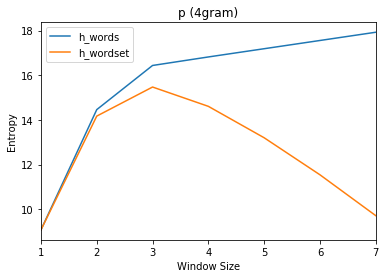

In [20]:
file = "NEW_4gram_alpha1_windows1to7_"+text
df = pd.read_csv(file, index_col=0, parse_dates=True)
df['window_size'] = [1,2,3,4,5,6,7]
ax = df.plot(x="window_size", y=["h_words", "h_wordset"], title=text+" (4gram)")
ax.set(xlabel="Window Size", ylabel="Entropy")
ax.set_xticks(range(1,8,1))
plt.show()


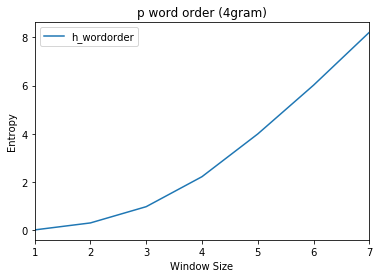

In [21]:
df['h_wordorder'] = df['h_words'] - df['h_wordset']
ax = df.plot(x="window_size", y=['h_wordorder'], title=text+" word order (4gram)")
ax.set(xlabel="Window Size", ylabel="Entropy")
ax.set_xticks(range(1,8,1))
plt.show()

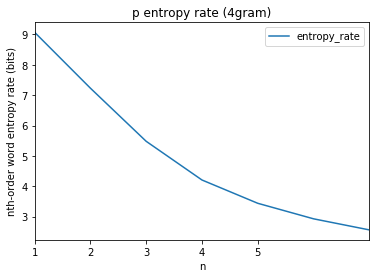

In [22]:
df['entropy_rate'] = df['h_words'] / df['window_size']
ax = df.plot(x="window_size", y=['entropy_rate'], title=text+" entropy rate (4gram)")
ax.set(xlabel="n", ylabel="nth-order word entropy rate (bits)")
ax.set_xticks(range(1,6,1))
plt.show()

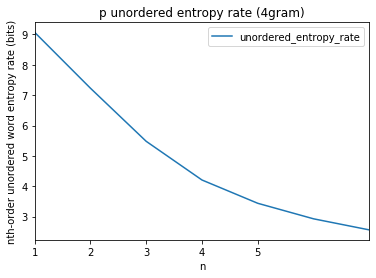

In [23]:
df['unordered_entropy_rate'] = df['h_words'] / df['window_size']
ax = df.plot(x="window_size", y=['unordered_entropy_rate'], title=text+" unordered entropy rate (4gram)")
ax.set(xlabel="n", ylabel="nth-order unordered word entropy rate (bits)")
ax.set_xticks(range(1,6,1))
plt.show()

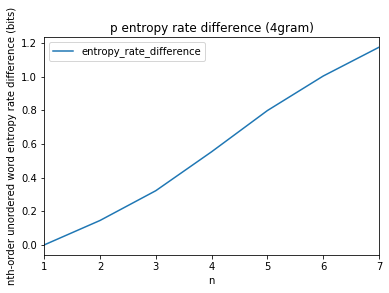

In [24]:
df['entropy_rate_difference'] = (df['h_words'] - df['h_wordset']) / df['window_size']
ax = df.plot(x="window_size", y=['entropy_rate_difference'], title=text+" entropy rate difference (4gram)")
ax.set(xlabel="n", ylabel="nth-order unordered word entropy rate difference (bits)")
ax.set_xticks(range(1,8,1))
plt.show()
